In [2]:
# Import
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load JSON
database_path = "../data/data.json"
data = pd.read_json(database_path)
# Preview the Data
data.head()

,id,title,company_name,location,via,description,extensions,schedule_type,work_from_home,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,1,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",Contractor,TRUE,,,NaN,"['qlik', 'power_bi', 'power_bi']"
1,2,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,NaN,['excel']
2,3,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",Full-time,,,,NaN,"['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],,,,,NaN,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,NaN,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


### Hard Skills Bar Chart

In [4]:
# Create dataframe for plotting showing the number and the percentage of job postings mentioning about each job skills
# count skill frequency from 'description_tokens' column
skill_freq = data['description_tokens'].str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
skill_freq = skill_freq.drop(skill_freq.index[0])

# create dataframe for skill frequency plot (TOP 10 SKILLS)
skill_freq_df = skill_freq.to_frame().reset_index()
skill_freq_df.rename(columns = {'index':'skills', 0:'number of postings'}, inplace = True)

# Add a 'percentage' colomn showing the percentage of the job postings mentions about each job skills.
skill_perct = skill_freq_df['number of postings']/len(data['id'])
skill_freq_df['percentage']= skill_perct

# select top 10 skills and convert percentarge to % format
skill_top_10_df = skill_freq_df.iloc[0:10]
skill_top_10_df.style.format({'percentage': '{:.2%}'.format})

,skills,number of postings,percentage
0,sql,5581,53.17%
1,excel,3764,35.86%
2,tableau,3077,29.31%
3,python,2955,28.15%
4,power_bi,2823,26.89%
5,r,1991,18.97%
6,sas,1134,10.80%
7,powerpoint,829,7.90%
8,word,787,7.50%
9,snowflake,761,7.25%


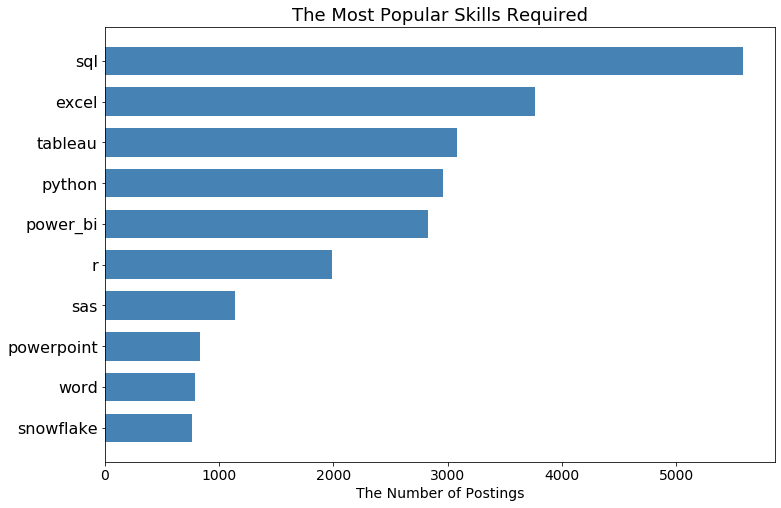

,skills,number of postings,percentage
11,azure,606,5.77%
12,spss,495,4.72%
13,jira,471,4.49%
14,microstrategy,438,4.17%
15,looker,435,4.14%


In [5]:
# Plot horizontal bar chart based on top 10 skills mentioend in the job posting following with a dataframe shows the ranking from 10-15.
# reverse the ranking
reversed_skill_top_10_df = skill_top_10_df.iloc[::-1]
y_axis = reversed_skill_top_10_df['skills']
x_axis = reversed_skill_top_10_df['number of postings']
# labels = reversed_skill_top_10_df['percentage']
plt.figure(figsize = (12,8))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Skills Required', fontsize=18)
plt.xlabel('The Number of Postings',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()
# dataframe shows the ranking from 10-15
skill_10_to_15_df = skill_freq_df.iloc[11:16]
skill_10_to_15_df.style.format({'percentage': '{:.2%}'.format})



### WordCloud

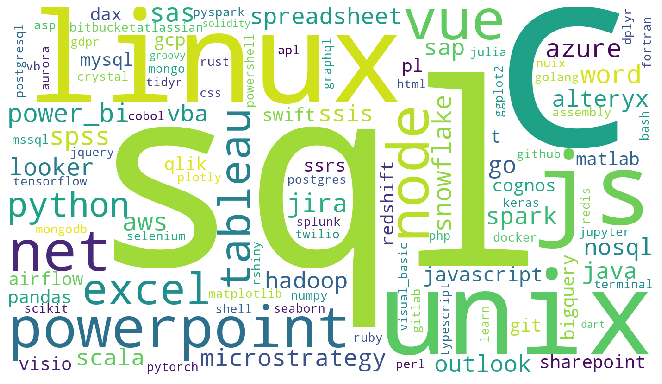

In [6]:
# Word cloud on hard skill field
# Import wordcloud and stopwords package to generate wordcloud graph based on 'skills' column.
from wordcloud import WordCloud, STOPWORDS

# Word cloud on description field
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["work"])
 
# iterate through the csv file
for val in skill_freq_df['skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
#plt.savefig('../images/wordcloud_skills.png')


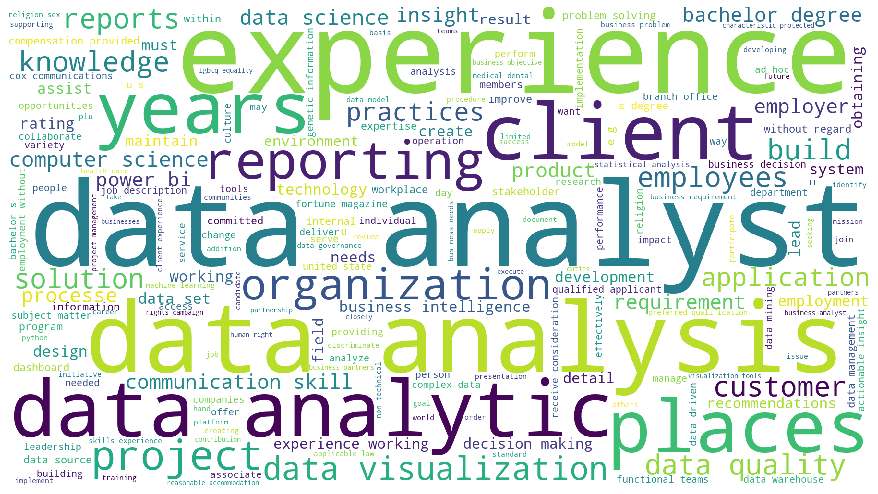

In [7]:
# Word cloud on description field
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["work", "ability", "support", "role", "sexual", "orientation", "responsible", "edward", "jones", "status", "support", "looking", "provide", "gender", "identity", \
                "report", "year", "race color", "equal", "opportunity", "team", "based", "able", "make", "focus", "drive", "employee", "develop", "ensure", "great", "place",\
                "race", "color", "partner", "need", "use", "understanding", "recommendation","national", "origin", "grow", "tool", \
                "help", "well", "will", "long", "term","national", "origin", "grow", "tool", "best", "practice", "company", "member", "understand", "one", \
                "meet", "salary", "range", "learn", "value","full", "time", "grow", "understand", "related", "position", "cross", "part"])
# iterate through the csv file
for val in data['description']:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1800, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
# save the image
#plt.savefig('../images/job_description.png')

### Soft SKills Bar Chart / luke's approach

In [8]:
#import
import pandas as pd
import glob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.corpus import stopwords
from IPython.display import set_matplotlib_formats


In [38]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import MWETokenizer

In [45]:
# ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
softskill_keywords_all = ['communication','active_listening','writing','public_speaking','interpersonal_skills',\
'empathy','conflict_resolution','teamwork','collaboration','leadership','decision_making','problem_solving',\
'time_management','organization','attention_to_detail','creativity','adaptability','flexibility','resilience',\
'patience','positive_attitude','self_motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural_sensitivity','diversity_and_inclusion',\
'networking','building_relationships','emotional_intelligence','critical_thinking','analytical skills','research_skills',\
'strategic_thinking','innovation','curiosity','learning_agility','risk_taking','negotiation','sales_skills','customer_service',\
'conflict_management','adaptation_to_change','coaching', 'mentoring','delegation','goal_setting',\
'customer_orientation','service_excellence','consensus_building','persuasion','creative_thinking','data_analysis',\
'detail_orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural_awareness',\
'humility','influence','interpersonal_communication','intuition','judgment','logical_thinking','marketing_skills','multitasking',\
'oral_communication','organizational_skills','persuasiveness','presentation_skills','problem_solving skills','relationship_building',\
'resourcefulness','risk_management','salesmanship','self_awareness','self_discipline','self_esteem','self_management','social_awareness',\
'social_intelligence','strategic_planning','stress_management','time_management skills','tolerance','transparency',\
'understanding_of_group_dynamics','understanding_of_human_behavior','understanding_of_motivation','verbal_communication','vision','work_ethic']

tokenizer = MWETokenizer([('active', 'listening'), ('public', 'speaking'), ('interpersonal', 'skills'), ('conflict', 'resolution'),\
     ('decision', 'making'), ('problem', 'solving'), ('time', 'management'), ('attention', 'to', 'detail'), ('positive', 'attitude'),\
        ('self', 'motivation'), ('cultural', 'sensitivity'), ('diversity', 'and', 'inclusion'), ('building', 'relationships'),\
            ('emotional', 'intelligence'), ('critical', 'thinking'), ('research', 'skills'), ('strategic', 'thinking'), ('learning', 'agility'), \
                ('risk', 'taking'), ('sales', 'skills'), ('customer', 'service'), ('conflict', 'management'), ('adaptation', 'to', 'change'),\
                     ('goal', 'setting'), ('customer', 'orientation'), ('service', 'excellence'), ('consensus', 'building'), ('creative', 'thinking'),\
                         ('data', 'analysis'), ('detail', 'orientation'), ('cultural', 'awareness'), ('interpersonal', 'communication'), ('logical', 'thinking'),\
                             ('marketing', 'skills'), ('oral', 'communication'), ('organizational', 'skills'), ('presentation', 'skills'), ('problem', 'solving skills'),\
                                 ('relationship', 'building'), ('risk', 'management'), ('self', 'awareness'), ('self', 'discipline'), ('self', 'esteem'), ('self', 'management'),\
                                     ('social', 'awareness'), ('social', 'intelligence'), ('strategic', 'planning'), ('stress', 'management'), ('time', 'management skills'),\
                                         ('understanding', 'of', 'group', 'dynamics'), ('understanding', 'of', 'human', 'behavior'), ('understanding', 'of', 'motivation'),\
                                             ('verbal', 'communication'), ('work', 'ethic')])






In [46]:
# create new column for tokenized words
data['tokenized_details'] = ""
for index, row in data.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
    detail = [word for word in detail if word in softskill_keywords_all] 
    # add to details list
    row.tokenized_details = detail


In [53]:
tokenizer

In [52]:
test = data['tokenized_details'].values.tolist()
test
#not working as expected so far

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


### Soft SKills Bar Chart / xuan's approach

In [34]:
# import
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xuandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Create a text file of all the description content and read it.
items = data['description'].tolist()
file = open("../data/description.txt",'w')
for item in items:
	file.write(item+"\n")
file.close()

# Open text file
with open("../data/description.txt") as f:
    text = f.read()

# Remove all punctuations from text file
text_without_punctuations = re.sub(r'[^\w\s]', '', text)

# Pass text after remvoing punctuations into word_tokenize() to return tokenized text. 
text_after_tokenizing = nltk.word_tokenize(text_without_punctuations)

# ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
softskill_keywords = (['communication','analytical','writing','organized','communication','empathy','teamwork','interpersonal','collaboration',\
        'collaborative','Strategic','leadership','innovative','creative','proactive','daptable','flexible','resourceful','resourceful','mentorship',\
        'coaching', 'influential','decisive','assertive','diplomatic','listening','patience','perseverance','teamwork','problemsolving' ])
text_with_softskill_keywords = [word for word in text_after_tokenizing if word in softskill_keywords]



# Handle multi-word tokenization
#tokenizer = MWETokenizer([('team', 'work')])
#text_token_combine = tokenizer.tokenize(text_without_punctuations)
#softskill_keywords = (['teamwork', 'team work', 'team-work'])
#text_with_softskill_keywords = [word for word in text_after_tokenizing if word in text_token_combine]


In [13]:
# Use Counter method find the frequency of words in sentences
from collections import Counter
softskill_count = Counter(text_with_softskill_keywords)

softskill_count_desc = sorted(softskill_count, key=softskill_count.get, reverse=True)
softskill_count_num_desc = sorted(softskill_count.items(), key=lambda pair: pair[1], reverse=True)

softskill_count_num_desc


[('analytical', 7726),
 ('communication', 5528),
 ('leadership', 3551),
 ('innovative', 2002),
 ('writing', 1584),
 ('flexible', 1560),
 ('collaborative', 1284),
 ('interpersonal', 1261),
 ('problemsolving', 1152),
 ('collaboration', 1016),
 ('creative', 656),
 ('organized', 438),
 ('proactive', 394),
 ('Strategic', 341),
 ('mentorship', 305),
 ('resourceful', 281),
 ('teamwork', 251),
 ('coaching', 215),
 ('listening', 143),
 ('empathy', 44),
 ('influential', 30),
 ('diplomatic', 16),
 ('patience', 9),
 ('decisive', 8),
 ('assertive', 8),
 ('perseverance', 5)]

In [14]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import MWETokenizer

In [37]:
# Sample list of expressions to count
word_list = ['communication', 'teamwork','active_listening','collaboration', 'public_speaking']
mwe_list = [('active', 'listening'), ('public', 'speaking')]


sample = ('we need someone to be good at teamwork and active listening, and someone with good communication skill and great public speaking skill as well.')

# Tokenize the text using MWETokenizer
tokenizer = MWETokenizer(mwe_list)
tokens = tokenizer.tokenize(nltk.word_tokenize(sample))

# Create a frequency distribution of the tokens
fdist = FreqDist(tokens)

# Count the occurrences of words and MWEs in the lists
word_counts = {word: fdist[word] for word in word_list}

print(word_counts)

{'communication': 1, 'teamwork': 1, 'active_listening': 1, 'collaboration': 0, 'public_speaking': 1}


In [35]:
##This is the real content one, taking forever but no need to run the code it's not working correct anyways. 

# Sample list of expressions to count
word_list = ['communication', 'active_listening','teamwork','collaboration']
mwe_list = [('active', 'listening'), ('public', 'speaking')]


# Tokenize the text using MWETokenizer
tokenizer = MWETokenizer(mwe_list)
tokens = tokenizer.tokenize(nltk.word_tokenize(text))

# Create a frequency distribution of the tokens
fdist = FreqDist(tokens)

# Count the occurrences of words and MWEs in the lists
word_counts = {word: fdist[word] for word in word_list}
mwe_counts = {mwe: fdist[mwe] for mwe in mwe_list}

print(word_counts)
print(mwe_counts)


KeyboardInterrupt: 

In [ ]:
# Used ChatGPT generated 100 most popular soft skills in data analyst job positings.

softskill_keywords_all = ['communication','active-listening','writing','public-speaking','interpersonal-skills',\
'empathy','conflict-resolution','teamwork','collaboration','leadership','decision-making','problem-solving',\
'time-management','organization','attention-to-detail','creativity','adaptability','flexibility','resilience',\
'patience','positive-attitude','self-motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural-sensitivity','diversity-and-inclusion',\
'networking','building-relationships','emotional-intelligence','critical-thinking','analytical skills','research-skills',\
'strategic-thinking','innovation','curiosity','learning-agility','risk-taking','negotiation','sales-skills','customer-service',\
'conflict-management','adaptation-to-change','coaching', 'mentoring','delegation','goal-setting',\
'customer-orientation','service-excellence','consensus-building','persuasion','creative-thinking','data-analysis',\
'detail-orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural-awareness',\
'humility','influence','interpersonal-communication','intuition','judgment','logical-thinking','marketing-skills','multitasking',\
'oral-communication','organizational-skills','persuasiveness','presentation-skills','problem-solving skills','relationship-building',\
'resourcefulness','risk-management','salesmanship','self-awareness','self-discipline','self-esteem','self-management','social-awareness',\
'social-intelligence','strategic-planning','stress-management','time-management skills','tolerance','transparency',\
'understanding-of-group-dynamics','understanding-of-human-behavior','understanding-of-motivation','verbal-communication','vision','work-ethic']

In [ ]:
['communication','active listening','writing','public speaking','interpersonal skills','empathy','conflict resolution','teamwork','collaboration','leadership','decision-making','problem-solving','time management','organization','attention to detail','creativity','adaptability','flexibility','resilience','patience','positive attitude','self-motivation','initiative','drive','accountability','responsibility','trustworthiness','honesty','integrity','reliability','professionalism','cultural sensitivity','diversity and inclusion','networking','building relationships','emotional intelligence','critical thinking','analytical skills','research skills','strategic thinking','innovation','curiosity','learning agility','risk-taking','negotiation','sales skills','customer service','conflict management','adaptation to change','coaching and mentoring','delegation','goal-setting','time-bound results orientation','customer orientation','service excellence','consensus-building','persuasion','creative thinking','data analysis','detail orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural awareness','humility','influence','interpersonal communication','intuition','judgment','logical thinking','marketing skills','multitasking','oral communication','organizational skills','persuasiveness','presentation skills','problem-solving skills','relationship building','resourcefulness','risk management','salesmanship','self-awareness','self-discipline','self-esteem','self-management','social awareness','social intelligence','strategic planning','stress management','time management skills','tolerance','transparency','understanding of group dynamics','understanding of human behavior','understanding of motivation','verbal communication','vision','work ethic']

['communication',
 'active listening',
 'writing',
 'public speaking',
 'interpersonal skills',
 'empathy',
 'conflict resolution',
 'teamwork',
 'collaboration',
 'leadership',
 'decision-making',
 'problem-solving',
 'time management',
 'organization',
 'attention to detail',
 'creativity',
 'adaptability',
 'flexibility',
 'resilience',
 'patience',
 'positive attitude',
 'self-motivation',
 'initiative',
 'drive',
 'accountability',
 'responsibility',
 'trustworthiness',
 'honesty',
 'integrity',
 'reliability',
 'professionalism',
 'cultural sensitivity',
 'diversity and inclusion',
 'networking',
 'building relationships',
 'emotional intelligence',
 'critical thinking',
 'analytical skills',
 'research skills',
 'strategic thinking',
 'innovation',
 'curiosity',
 'learning agility',
 'risk-taking',
 'negotiation',
 'sales skills',
 'customer service',
 'conflict management',
 'adaptation to change',
 'coaching and mentoring',
 'delegation',
 'goal-setting',
 'time-bound results 